In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = df.iloc[:, :-1]  # All columns except the last one (label)
y = df.iloc[:, -1]   # Only the last column (label)

In [18]:
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [20]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(10, activation='relu'),        # First hidden layer with 10 neurons
    layers.Dense(10, activation='relu'),        # Second hidden layer with 10 neurons
    layers.Dense(y_encoded.shape[1], activation='softmax')  # Output layer with softmax activation
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203 (812.00 B)

 Trainable params: 203 (812.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2930 - loss: 2.6890 - val_accuracy: 0.5000 - val_loss: 1.6130
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2930 - loss: 2.1357 - val_accuracy: 0.5000 - val_loss: 1.2274
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3125 - loss: 1.5652 - val_accuracy: 0.5417 - val_loss: 0.8943
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3659 - loss: 1.1560 - val_accuracy: 0.5417 - val_loss: 0.7127
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4440 - loss: 0.9975 - val_accuracy: 0.5000 - val_loss: 0.8251
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4401 - loss: 0.9692 - val_accuracy: 0.3333 - val_loss: 1.0649
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3919 - loss: 1.0310 - val_accuracy: 0.2917 - val_loss: 1.1426
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3451 - loss: 1.0815 - val_accuracy: 0.3333 - val_loss:

In [23]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Step 9: Evaluate the Model
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy of Neural Network: 60.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.43      1.00      0.60         9
           2       1.00      0.82      0.90        11

    accuracy                           0.60        30
   macro avg       0.48      0.61      0.50        30
weighted avg       0.50      0.60      0.51        30



C:\Users\Suvadip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Suvadip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Suvadip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy of Neural Network: 60.00%


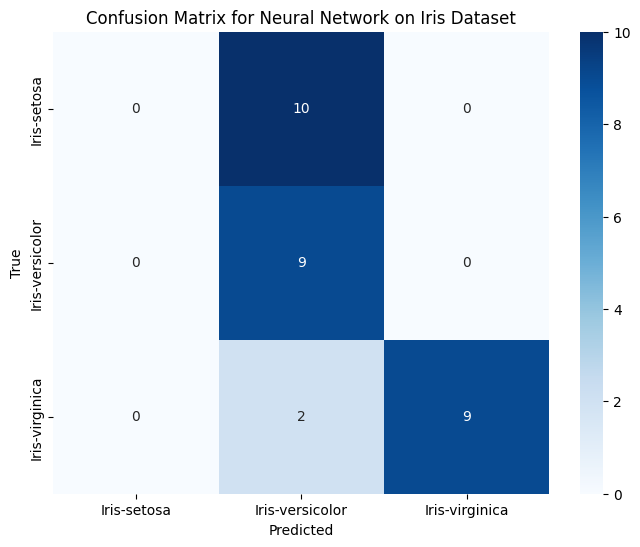

In [24]:
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network on Iris Dataset')
plt.show()